In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras as tf_keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# import zipfile
# zip_file = 'D:\\Workspace\\final\\jey\\IMG_CLASSES.zip'

In [4]:
# extract_folder = "D:\\Workspace\\final\\jey\\content\\skin-data"

In [ ]:
# with zipfile.ZipFile(zip_file, 'r') as zip_ref:
#  zip_ref.extractall(extract_folder)
# print(f"파일이 {extract_folder}폴더에 압축 해제되었습니다")

1. Eczema 1677
2. Melanoma 15.75k
3. Atopic Dermatitis - 1.25k
4. Basal Cell Carcinoma (BCC) 3323
5. Melanocytic Nevi (NV) - 7970
6. Benign Keratosis-like Lesions (BKL) 2624
7. Psoriasis pictures Lichen Planus and related diseases - 2k
8. Seborrheic Keratoses and other Benign Tumors - 1.8k
9. Tinea Ringworm Candidiasis and other Fungal Infections - 1.7k
10. Warts Molluscum and other Viral Infections - 2103

In [ ]:
import os
import shutil
import random

# 경로 설정
# base_dir = r"D:\\Workspace\\final\\jey\\content\\skin-data"  # 'train' 폴더가 있는 디렉터리
# split_dir = r"D:\\Workspace\\final\\jey\\content\\skin-data"  # train, val, test 폴더를 저장할 폴더

# train, test, val 폴더 만들기
# os.makedirs(split_dir, exist_ok=True)

# 클래스별로 train, val, test 폴더를 만들기
# for label in range(1, 11):  # 클래스 1~10
#     class_folder = os.path.join(base_dir, str(label))
#     if not os.path.exists(class_folder):
#         print(f"경고: {class_folder} 디렉터리가 존재하지 않습니다.")
#         continue

    # 각 클래스 폴더에 대해 train, val, test 폴더 만들기
#     train_folder = os.path.join(split_dir, 'train', str(label))
#     val_folder = os.path.join(split_dir, 'val', str(label))
#     test_folder = os.path.join(split_dir, 'test', str(label))

#     os.makedirs(train_folder, exist_ok=True)
#     os.makedirs(val_folder, exist_ok=True)
#     os.makedirs(test_folder, exist_ok=True)

    # 클래스별 이미지 파일 리스트
#     images = os.listdir(class_folder)
#     random.shuffle(images)  # 이미지 셔플

    # 데이터 분할 비율
#     total_images = len(images)
#     train_size = int(total_images * 0.7)  # 70% 훈련용
#     val_size = int(total_images * 0.15)  # 15% 검증용
#     test_size = total_images - train_size - val_size  # 나머지 15%는 테스트용

    # 분할된 이미지 리스트
#     train_images = images[:train_size]
#     val_images = images[train_size:train_size + val_size]
#     test_images = images[train_size + val_size:]

    # 이미지 복사 함수
#     def copy_images(image_list, src_folder, dest_folder):
#         for image in image_list:
#             src_path = os.path.join(src_folder, image)
#             dest_path = os.path.join(dest_folder, image)
#             shutil.copy(src_path, dest_path)

    # 이미지 복사
#     copy_images(train_images, class_folder, train_folder)
#     copy_images(val_images, class_folder, val_folder)
#     copy_images(test_images, class_folder, test_folder)

#     print(f"클래스 {label}: {train_size}개 train, {val_size}개 val, {test_size}개 test로 분리 완료")

# print("데이터셋 분리 완료")


In [7]:
train_dir = 'content/skin-data/train'
test_dir = 'content/skin-data/test'
val_dir = 'content/skin-data/val'

In [8]:
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip = True,
    preprocessing_function=preprocess_input
)

val_datagen = ImageDataGenerator(rescale=1./255, preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(rescale=1./255, preprocessing_function=preprocess_input)



In [9]:
from PIL import Image

image_path = 'content/skin-data/test/1/t-03DermatitisArm.jpg'
image = Image.open(image_path)
width, height = image.size

print(f"이미지 크기: {width}x{height}")

이미지 크기: 720x472


In [10]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # 이미지 크기 조정
    batch_size=32,
    class_mode='categorical'  # 다중 클래스 분류
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 17923 images belonging to 10 classes.
Found 3838 images belonging to 10 classes.
Found 3850 images belonging to 10 classes.


In [23]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten,  Dropout

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# base_model.trainable = False

# 특정 레이어까지 동결 (ex: 앞의 140개 레이어 동결)
for layer in base_model.layers[:140]:
    layer.trainable = False

# 나머지 레이어는 학습 가능하게 설정
for layer in base_model.layers[140:]:
    layer.trainable = True

model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(
    optimizer = optimizer,
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 576)             

In [24]:
base_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 576)              

In [ ]:
# ResNet50 모델 로드 (ImageNet 가중치 사용, include_top=False)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# 전체 레이어 개수 출력
print(f"ResNet50 전체 레이어 개수: {len(base_model.layers)}")

ResNet50 전체 레이어 개수: 175


In [27]:
# 모델 학습
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=5,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size
)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [15]:
model.evaluate(test_generator)

121/121 [==============================] - 194s 2s/step - loss: 2.1788 - accuracy: 0.2506


[2.1788012981414795, 0.2506493628025055]

In [16]:
history

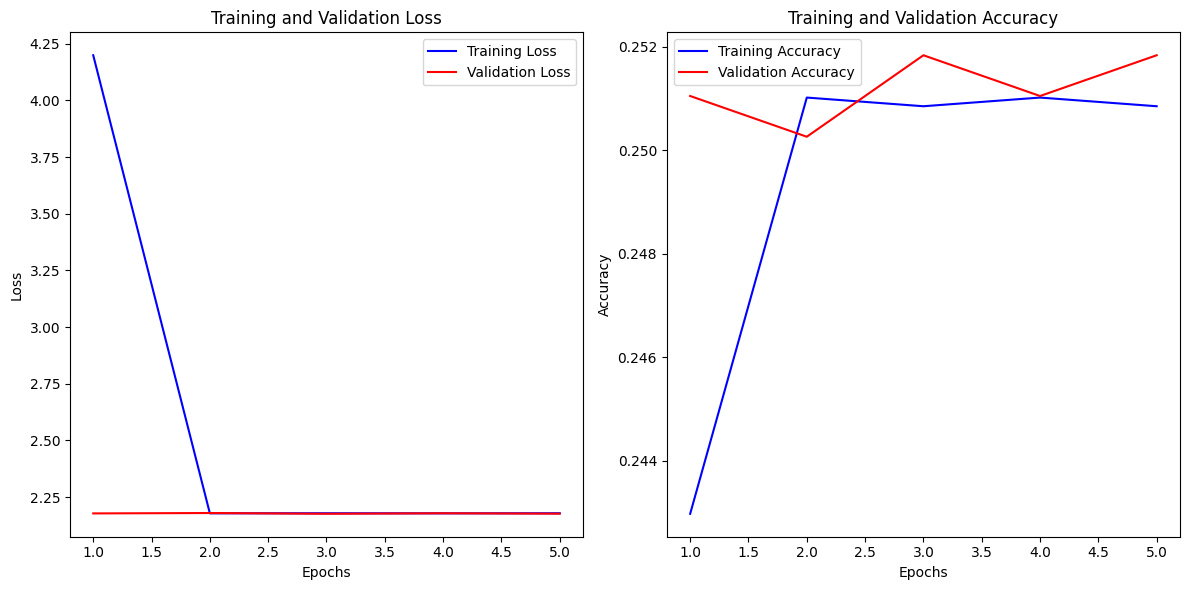

In [17]:
import matplotlib.pyplot as plt

# 학습 기록에서 손실과 정확도 데이터를 가져옴
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history.get('accuracy', None)
val_accuracy = history.history.get('val_accuracy', None)

epochs = range(1, len(loss) + 1)

# 손실 그래프
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 정확도 그래프 (정확도가 있는 경우만)
if accuracy and val_accuracy:
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
    plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

plt.tight_layout()
plt.show()
